<a href="https://colab.research.google.com/github/Xianghe515/COLAB/blob/main/2nd_ch8tpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 배치 정규화(Batch Normalizaition)
# 라이브러리 로드
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 로드
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.info())

# label(정답) 데이터
df['label'] = iris.target # 붓꽃 종류 *iris.target_name -> sarray(['setosa', 'versicolor', 'virginica']
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
# 데이터셋에 대한 원-핫 인코딩 적용
label = pd.get_dummies(df['label'], prefix='label')   # prefix - 컬럼 이름 앞에 접두사 처리
label
# 이전에 있던 df에 label을 추가
df = pd.concat([df, label], axis=1)
# 이전에 있던 'label'을 삭제
df.drop(['label'], axis=1, inplace=True)  # inplace - df 내 값을 변경 적용
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [3]:
# 훈련 데이터와 검증 데이터 나누기 훈련 데이터와 검증 데이터 나누기
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# 배열로 변경
X = np.asarray(X)
print("train_test data : \n", X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
y = np.asarray(y)
print("label data : \n", y)

train_test data : 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4

In [4]:
# 데이터 및 label을 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [5]:
# 배치 정규화가 적용되지 않은 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Input

model = Sequential([
    Input(shape=(4,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,763 (147.51 KB)

 Trainable params: 37,763 (147.51 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# TPU로 실행하면 NOT FOUND 오류 발생
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.25, batch_size=10, verbose=2)

Epoch 1/100
9/9 - 3s - 291ms/step - accuracy: 0.9444 - loss: 0.1502 - val_accuracy: 0.9333 - val_loss: 0.1237
Epoch 2/100
9/9 - 0s - 34ms/step - accuracy: 0.9889 - loss: 0.0638 - val_accuracy: 0.9667 - val_loss: 0.0689
Epoch 3/100
9/9 - 0s - 15ms/step - accuracy: 0.9778 - loss: 0.0661 - val_accuracy: 0.9333 - val_loss: 0.1151
Epoch 4/100
9/9 - 0s - 14ms/step - accuracy: 0.9778 - loss: 0.0729 - val_accuracy: 0.9667 - val_loss: 0.0719
Epoch 5/100
9/9 - 0s - 18ms/step - accuracy: 0.9889 - loss: 0.0649 - val_accuracy: 0.9333 - val_loss: 0.0948
Epoch 6/100
9/9 - 0s - 34ms/step - accuracy: 0.9778 - loss: 0.0530 - val_accuracy: 0.9667 - val_loss: 0.0663
Epoch 7/100
9/9 - 0s - 17ms/step - accuracy: 0.9778 - loss: 0.0738 - val_accuracy: 0.9333 - val_loss: 0.0698
Epoch 8/100
9/9 - 0s - 35ms/step - accuracy: 0.9778 - loss: 0.0676 - val_accuracy: 0.9333 - val_loss: 0.1224
Epoch 9/100
9/9 - 0s - 33ms/step - accuracy: 0.9667 - loss: 0.0612 - val_accuracy: 0.9667 - val_loss: 0.0660
Epoch 10/100
9/9 -

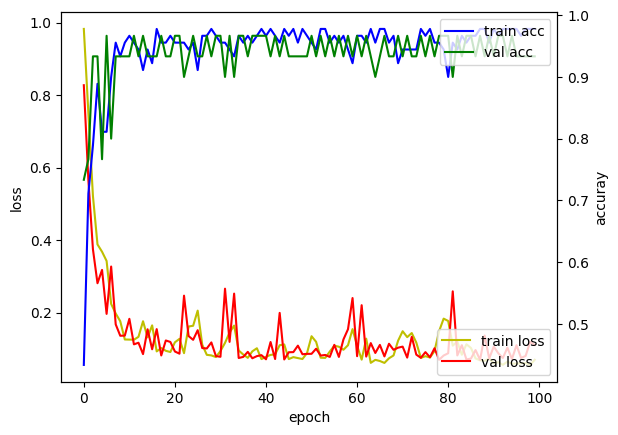

In [10]:
# 훈련 결과 시각화
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')

plt.show()

In [8]:
# 정확도와 손실 정보 표현
loss_and_metrics = model.evaluate(X_test, y_test)
print('손실과 정확도 평가')
print(loss_and_metrics)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9333 - loss: 0.0728   
손실과 정확도 평가
[0.0728052631020546, 0.9333333373069763]


In [11]:
# 배치 정규화가 적용된 모델 생성
from tensorflow.keras.initializers import RandomNormal, Constant
model2 = Sequential([
    Input(shape=(4,)),
    Dense(64, activation='relu'),
    BatchNormalization(),   # 배치 정규화

    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    BatchNormalization(
        momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)
    ),
    Dense(3, activation='softmax'),
])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,435 (165.76 KB)

 Trainable params: 42,179 (164.76 KB)

 Non-trainable params: 256 (1.00 KB)

In [22]:
# TPU로 실행하면 NOT FOUND 오류 발생
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.25, batch_size=10, verbose=2)

Epoch 1/100
9/9 - 5s - 514ms/step - accuracy: 0.9778 - loss: 0.0558 - val_accuracy: 0.9667 - val_loss: 0.1992
Epoch 2/100
9/9 - 1s - 135ms/step - accuracy: 0.9778 - loss: 0.0466 - val_accuracy: 0.9333 - val_loss: 0.2493
Epoch 3/100
9/9 - 0s - 10ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.9333 - val_loss: 0.2085
Epoch 4/100
9/9 - 0s - 9ms/step - accuracy: 1.0000 - loss: 0.0178 - val_accuracy: 0.9333 - val_loss: 0.1998
Epoch 5/100
9/9 - 0s - 9ms/step - accuracy: 1.0000 - loss: 0.0199 - val_accuracy: 0.9667 - val_loss: 0.3205
Epoch 6/100
9/9 - 0s - 9ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9333 - val_loss: 0.1453
Epoch 7/100
9/9 - 0s - 15ms/step - accuracy: 0.9889 - loss: 0.0152 - val_accuracy: 0.9333 - val_loss: 0.1870
Epoch 8/100
9/9 - 0s - 9ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.9333 - val_loss: 0.3281
Epoch 9/100
9/9 - 0s - 10ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9333 - val_loss: 0.3888
Epoch 10/100
9/9 - 0s

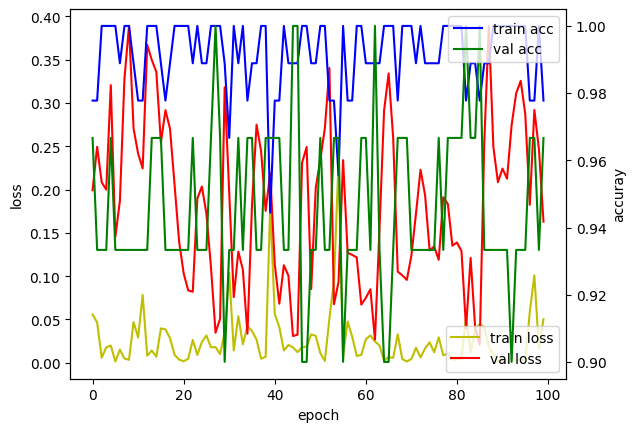

In [23]:
# 훈련 결과 시각화
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history2.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')

plt.show()

In [24]:
# 정확도와 손실 정보 표현
loss_and_metrics = model2.evaluate(X_test, y_test)
print('손실과 정확도 평가')
print(loss_and_metrics)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step - accuracy: 0.9667 - loss: 0.1561
손실과 정확도 평가
[0.15608081221580505, 0.9666666388511658]


In [34]:
# 드롭아웃 예제
# 라이브러리
import tensorflow_datasets as tfds
import tensorflow as tf

(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    with_info=True,
    as_supervised=True
)


ValueError: Failed to construct dataset "imdb_reviews", builder_kwargs "{'config': 'subwords8k', 'data_dir': None}": BuilderConfig subwords8k not found with version None. Available: ['plain_text']

In [29]:
# imdb_reviews 데이터를 불러옴.
(train_data, test_data), info = tfds.load(
    'imdb_reviews',  # Remove '/subwords8k' to load the default config
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    with_info=True,
    as_supervised=True
)
# Change padded_shapes to reflect the dataset structure
# The dataset has a single string (scalar) for text and a scalar for the label
padded_shapes = ((), ())  # Padded shapes for text and label
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

In [32]:
train_batch, train_labels = next(iter(train_batches))

In [33]:
train_batch.numpy()

array([b'First, this was a BRAVE film. I\'ve seen Irreversible and can understand the comparisons. However, I cannot begin to understand the people who\'ve trashed this film. I can see how the end may have come off extreme but I\'d be lying if I didn\'t say I wished that every guy who\'s ever forced a woman into sex deserved exactly what Jared got. Conversely, it didn\'t solve anything or make anything better and the fact that the film doesn\'t pretend to is what made me appreciate it.<br /><br />The comment prior to this one called the film pathetic and claimed no adult would stick with. I certainly did and intently. I\'m 24 years old. The way the film drags made it realistic to me. People have become so used to eye candy and fast paced plots on screen that if you ask them to concentrate too long on one brick in the foundation of a film, not only do they lose interest, they demolish whatever has been built, and call it rubbish. When in actuality it\'s their lack of patience and compre